In [1]:
#Importing Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [2]:
df=pd.read_excel('covid19_clinical_dataset.xls')
df

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,...,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,0.236515,-0.022340,-0.517413,0.010677,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5639,ae66feb9e4dc3a0,3,positive,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5640,517c2834024f3ea,17,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5641,5c57d6037fe266d,4,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5642,c20c44766f28291,10,negative,0,0,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
pd.set_option('display.max_columns',None)

In [4]:
#checking the datatype of each column 
print(df.dtypes)

print(df.info())

Patient ID                                                object
Patient age quantile                                       int64
SARS-Cov-2 exam result                                    object
Patient addmited to regular ward (1=yes, 0=no)             int64
Patient addmited to semi-intensive unit (1=yes, 0=no)      int64
                                                          ...   
HCO3 (arterial blood gas analysis)                       float64
pO2 (arterial blood gas analysis)                        float64
Arteiral Fio2                                            float64
Phosphor                                                 float64
ctO2 (arterial blood gas analysis)                       float64
Length: 111, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5644 entries, 0 to 5643
Columns: 111 entries, Patient ID to ctO2 (arterial blood gas analysis)
dtypes: float64(71), int64(4), object(36)
memory usage: 4.8+ MB
None


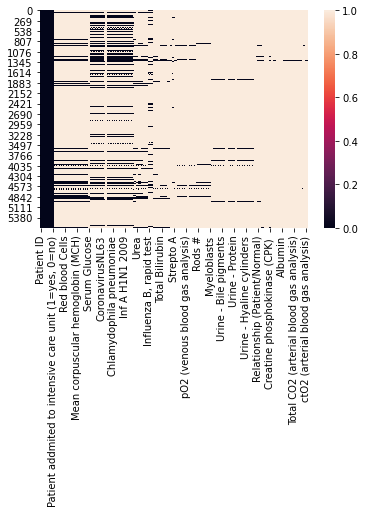

In [5]:
#checking null values using heat map
sns.heatmap(df.isnull())

In [6]:
df.isnull().sum()

Patient ID                                                  0
Patient age quantile                                        0
SARS-Cov-2 exam result                                      0
Patient addmited to regular ward (1=yes, 0=no)              0
Patient addmited to semi-intensive unit (1=yes, 0=no)       0
                                                         ... 
HCO3 (arterial blood gas analysis)                       5617
pO2 (arterial blood gas analysis)                        5617
Arteiral Fio2                                            5624
Phosphor                                                 5624
ctO2 (arterial blood gas analysis)                       5617
Length: 111, dtype: int64

In [7]:
df.fillna(0, inplace = True)

In [8]:
df.isnull().sum()

Patient ID                                               0
Patient age quantile                                     0
SARS-Cov-2 exam result                                   0
Patient addmited to regular ward (1=yes, 0=no)           0
Patient addmited to semi-intensive unit (1=yes, 0=no)    0
                                                        ..
HCO3 (arterial blood gas analysis)                       0
pO2 (arterial blood gas analysis)                        0
Arteiral Fio2                                            0
Phosphor                                                 0
ctO2 (arterial blood gas analysis)                       0
Length: 111, dtype: int64

# Data Visualization

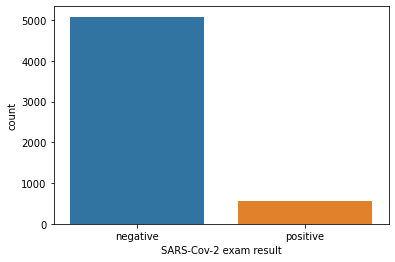

In [9]:
sns.countplot(df['SARS-Cov-2 exam result'])

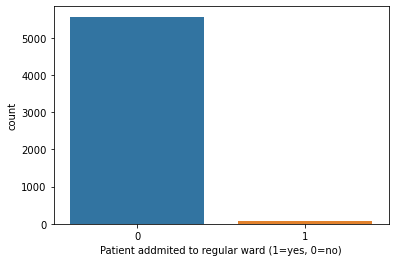

In [10]:
sns.countplot(df['Patient addmited to regular ward (1=yes, 0=no)'])

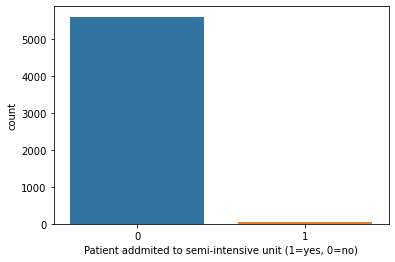

In [11]:
sns.countplot(df['Patient addmited to semi-intensive unit (1=yes, 0=no)'])

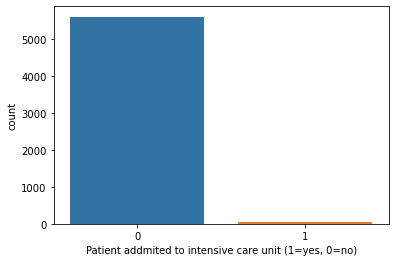

In [12]:
sns.countplot(df['Patient addmited to intensive care unit (1=yes, 0=no)'])

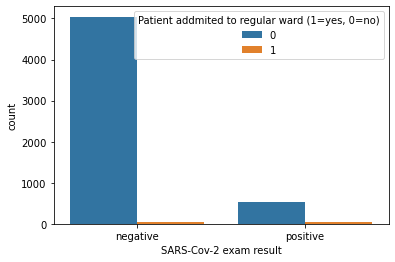

In [13]:
sns.countplot(x='SARS-Cov-2 exam result',hue='Patient addmited to regular ward (1=yes, 0=no)',data=df)

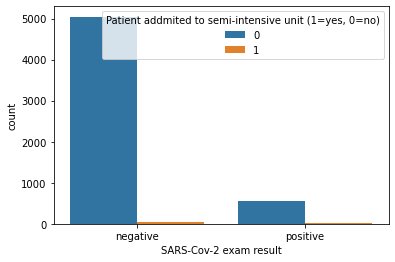

In [14]:
sns.countplot(x='SARS-Cov-2 exam result',hue='Patient addmited to semi-intensive unit (1=yes, 0=no)',data=df)

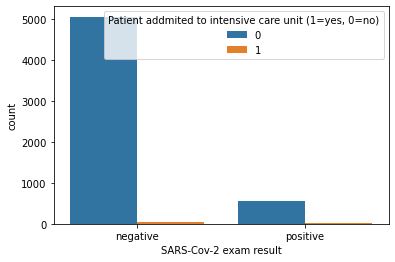

In [15]:
sns.countplot(x='SARS-Cov-2 exam result',hue='Patient addmited to intensive care unit (1=yes, 0=no)',data=df)

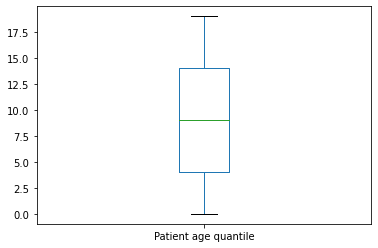

In [16]:
df["Patient age quantile"].plot.box()

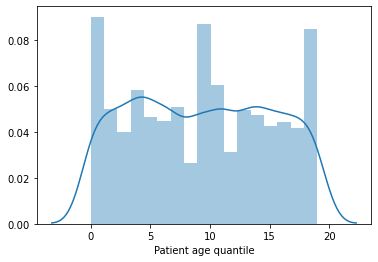

In [17]:
sns.distplot(df['Patient age quantile'])

{'bodies': [<matplotlib.collections.PolyCollection at 0x21cef87a6d0>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x21cef87a550>,
 'cmins': <matplotlib.collections.LineCollection at 0x21cef87a580>,
 'cbars': <matplotlib.collections.LineCollection at 0x21cef87ab20>}

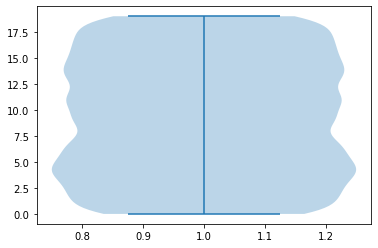

In [18]:
plt.violinplot(df['Patient age quantile'])

# Transforming Data set into numerical category by using LabelEncoder

In [19]:
#Using Label Encoder 
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['SARS-Cov-2 exam result','Respiratory Syncytial Virus','Influenza A' ,'Influenza B',
       'Parainfluenza 1' ,'CoronavirusNL63' ,'Rhinovirus/Enterovirus', 'Mycoplasma pneumoniae',
        'Coronavirus HKU1', 'Parainfluenza 3' , 'Chlamydophila pneumoniae' ,'Adenovirus',
          'Parainfluenza 4' ,'Coronavirus229E' ,'CoronavirusOC43' ,'Inf A H1N1 2009' , 'Bordetella pertussis',
           'Metapneumovirus', 'Parainfluenza 2','Influenza B, rapid test' ,'Influenza A, rapid test',
'Strepto A' ,'Urine - Esterase','Urine - Aspect',
'Urine - pH','Urine - Hemoglobin','Urine - Bile pigments' ,'Urine - Ketone Bodies',
'Urine - Nitrite','Urine - Urobilinogen', 'Urine - Protein' , 'Urine - Crystals',
'Urine - Hyaline cylinders', 'Urine - Granular cylinders' ,'Urine - Yeasts',
'Urine - Color'

]
for val in list1:
     df[val]=le.fit_transform(df[val].astype(str))

In [20]:
# droping Patient ID column from  dataset
df= df.drop("Patient ID",axis = 1)

# Statistical Analysis

In [21]:
df.describe()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
count,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.000000,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.0,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.0,5644.000000,5644.000000,5644.000000,5644.000000,5644.00000,5644.000000,5644.000000,5.644000e+03,5644.000000,5644.000000,5644.0,5.644000e+03,5644.000000,5.644000e+03,5644.000000,5644.000000,5644.000000,5644.000000,5644.0,5.644000e+03,5.644000e+03,5.644000e+03,5644.0,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5644.0,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03,5.644000e+03
mean,9.318391,0.098866,0.013997,0.008859,0.007264,-2.335732e-10,-1.710835e-09,-3.770503e-11,7.894130e-10,8.985679e-10,-8.390814e-10,1.082473e-10,6.629928e-10,-7.075675e-10,-3.683047e-10,7.686216e-10,-4.432198e-10,-3.428930e-10,1.088413e-09,2.605525e-10,0.470588,0.476612,0.466159,

In [22]:
df.corr()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
Patient age quantile,1.000000,0.075244,4.616576e-02,0.015736,-0.035772,0.031292,0.019498,-0.051183,0.038392,-0.012099,-0.040620,-0.040213,-0.053667,0.034682,0.063669,0.007124,0.090847,0.016385,0.053681,0.038632,-0.004644,-0.018124,-0.010242,-0.017652,-0.018663,-0.001011,NaN,-0.018832,-0.018431,-0.017502,-0.013473,-0.014038,-0.017466,-0.017221,-0.011411,-0.016905,-0.016024,-0.017278,0.024183,0.087847,0.026245,0.098785,0.000476,-0.001231,-0.130636,-0.133817,0.026923,0.008113,0.040960,0.027392,0.050402,0.001514,-0.083812,-0.037983,-0.141642,-0.012330,0.036681,-0.010471,0.097924,-0.012574,NaN,0.088728,0.045224,0.090102,0.007478,0.045603,0.020867,0.028753,0.014337,NaN,0.011549,0.007090,0.000529,0.020280,0.015301,0.029753,1.539552e-02,-0.015191,0.015766,0.006880,NaN,-0.014617,-0.000144,0.020489,0.011232,0.011172,0.013775,0.011810,NaN,-0.018227,0.002446,-0.022409,NaN,4.883140e-03,-0.015002,2.721363e-02,0.007064,-1.215658e-02,NaN,-7.563036e-03,-0.016286,-0.034110,0.041484,0.041507,0.006264,0.012090,-0.007157,-0.021239,-4.135060e-02,-0.004455
SARS-Cov-2 exam result,0.075244,1.000000,1.424375e-01,0.019364,0.027586,0.037396,0.039530,-0.106482,0.040622,0.045766,-0.005749,0.017285,-0.108835,-0.023763,-0.010744,-0.072659,-0.020835,0.074431,-0.015035,-0.004426,-0.027175,-0.029288,-0.027726,-0.029950,-0.029459,-0.009191,NaN,-0.028903,-0.029520,-0.029582,-0.029335,-0.028965,-0.030279,-0.029643,-0.023993,-0.030012,-0.029274,-0.030134,-0.013552,-0.021883,0.024927,0.026500,-0.027329,-0.028995,-0.033857,-0.037225,0.029047,0.038741,0.028945,-0.031222,-0.017776,-0.035217,-0.013557,-0.031266,-0.047549,-0.008157,-0.001436,0.000980,

# Splitting Data into target and Input¶

In [23]:
x=df.drop(['Patient addmited to regular ward (1=yes, 0=no)'],axis=1)
y=df["Patient addmited to regular ward (1=yes, 0=no)"]

In [24]:
x.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to semi-intensive unit (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,2,2,1,0,2,2,2,2,2,2,2,2,2,2,1,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.

In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Patient addmited to regular ward (1=yes, 0=no), dtype: int64

In [26]:
# scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [28]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [29]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 82 is 0.9929140832595217


82

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(4515, 109)
(4515,)
(1129, 109)
(1129,)


# Using GridSearchCV to select best Parameter¶


In [31]:
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")






dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)




{'penalty': 'l2'}


{'n_neighbors': 6}


{'criterion': 'entropy'}


{'learning_rate': 0.001, 'n_estimators': 10}


{'max_features': 'sqrt', 'n_estimators': 10}


{'learning_rate': 0.1, 'n_estimators': 100}




The model score for LogisticRegression() are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.9929140832595217
The cv score is 0.9861801066656615

[[1119    8]
 [   0    2]]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1127
           1       0.20      1.00      0.33         2

    accuracy                           0.99      1129
   macro avg       0.60      1.00      0.66      1129
weighted avg       1.00      0.99      1.00      1129



roc_auc_score 0.6


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=6) are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.9911426040744021
The cv score is 0.9860029587471496

[[1119   10]
 [   0    0]]

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1129
           1       0.00      0.00      0.00         0

    accuracy                           0.99      1129
   macro avg       0.50      0.50      0.50

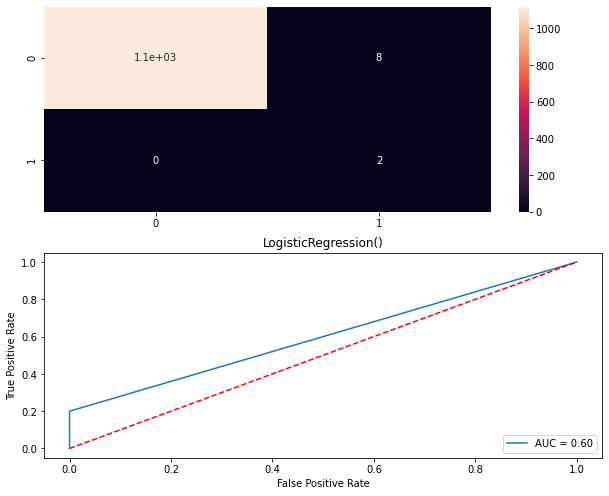

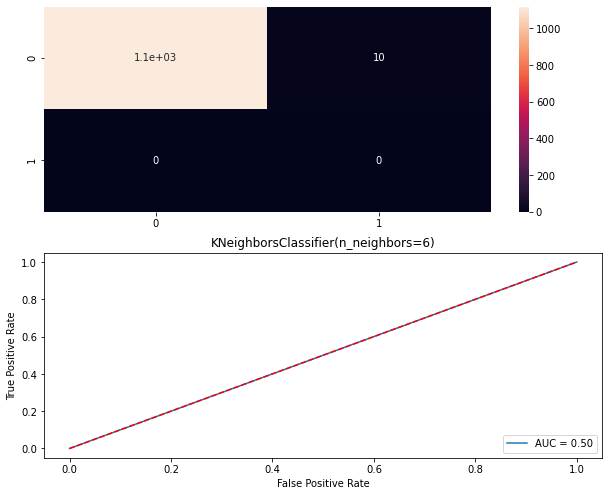

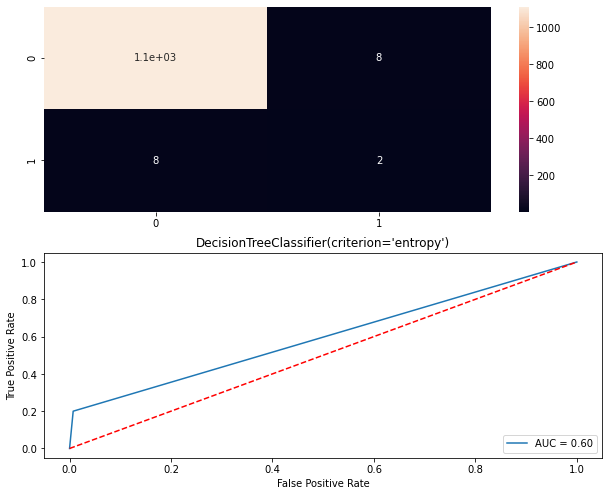

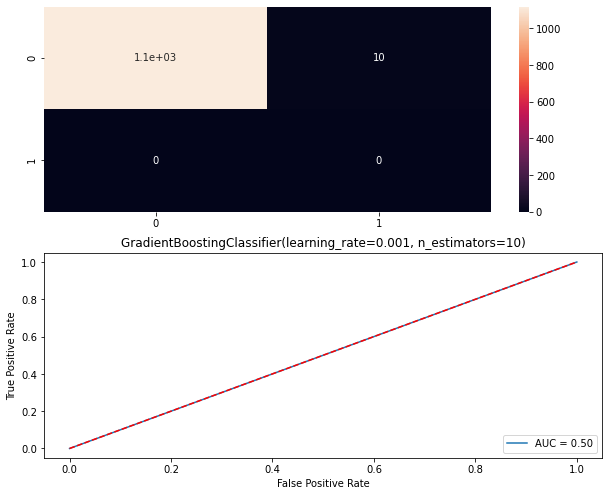

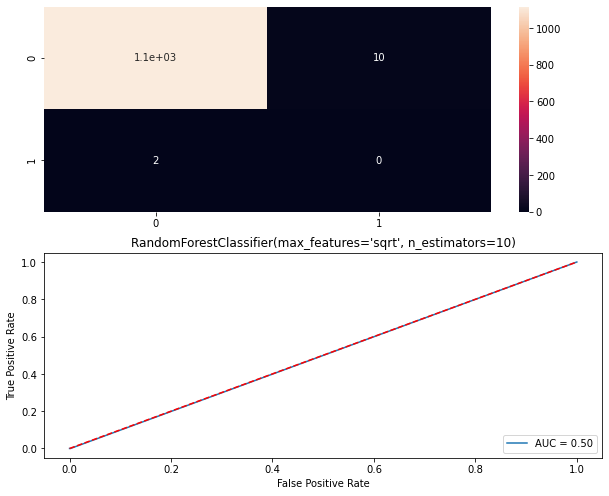

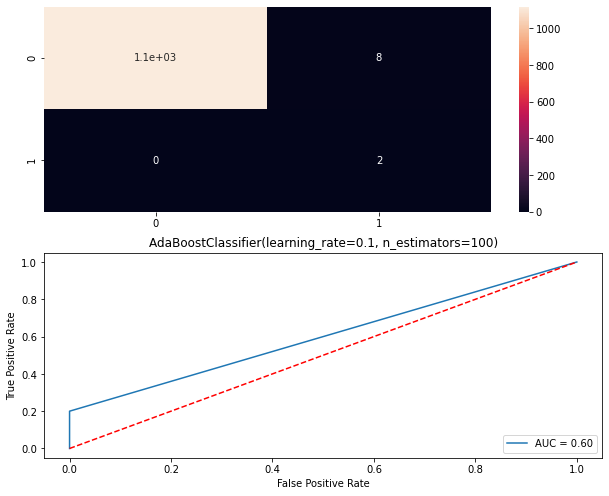

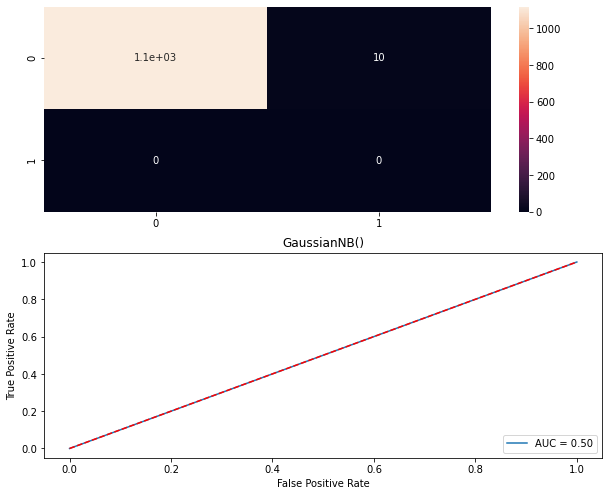

In [32]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=6),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=0.001,n_estimators=10),
          RandomForestClassifier(max_features='sqrt',n_estimators=10),
          AdaBoostClassifier(learning_rate =0.1, n_estimators = 100,),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    

In [33]:

result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.992914,0.986180,0.600000
1,KNeighborsClassifier,0.991143,0.986003,0.500000
2,DecisionTreeClassifier,0.985828,0.976255,0.596425
3,GradientBoostingClassifier,0.991143,0.986003,0.500000
4,RandomForestClassifier,0.989371,0.983875,0.499106
5,GaussianNB,0.992914,0.984584,0.600000
6,AdaBoostClassifier,0.991143,0.984231,0.500000


In [61]:
gbc= GradientBoostingClassifier(learning_rate=0.001,n_estimators=10)
gbc.fit(x_train,y_train)
predict=gbc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score=',roc_auc)

Accuracy Score = 0.9911426040744021
The CV Score = 0.98423147956203
roc_auc_score= 0.5


# Now Taking Patient addmited to semi-intensive unit (1=yes, 0=no) as Output Variable

In [36]:
X=df.drop(['Patient addmited to semi-intensive unit (1=yes, 0=no)'],axis=1)
Y=df["Patient addmited to semi-intensive unit (1=yes, 0=no)"]

In [38]:
X.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to intensive care unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,2,2,1,0,2,2,2,2,2,2,2,2,2,2,1,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0

In [39]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Patient addmited to semi-intensive unit (1=yes, 0=no), dtype: int64

In [40]:
#  scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [42]:
def max_acc_score(clf,X,Y):
    max_acc_score=0
    for i in range(42,101):
        X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state= i ,test_size=0.20)
        clf.fit(X_train,Y_train)
        pred=clf.predict(X_test)
        acc_score=accuracy_score(pred,Y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [43]:
lg=LogisticRegression()
max_acc_score(lg,X,Y)

max acc score corresponding to 54 is 0.9964570416297609


54

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=54,test_size=0.20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4515, 109)
(4515,)
(1129, 109)
(1129,)


# Using GridSearchCV to select best Parameter

In [45]:
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")


knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")






dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(gbc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)




{'penalty': 'l2'}


{'n_neighbors': 8}


{'criterion': 'gini'}


{'learning_rate': 0.001, 'n_estimators': 10}


{'max_features': 'log2', 'n_estimators': 150}


{'learning_rate': 1, 'n_estimators': 120}




The model score for LogisticRegression() are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.9964570416297609
The cv score is 0.9891902078661214

[[1125    3]
 [   1    0]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1128
           1       0.00      0.00      0.00         1

    accuracy                           1.00      1129
   macro avg       0.50      0.50      0.50      1129
weighted avg       1.00      1.00      1.00      1129



roc_auc_score 0.49955595026642985


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=8) are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.9973427812223207
The cv score is 0.9911410336141315

[[1126    3]
 [   0    0]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1129
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1129
   macro avg       0.50    

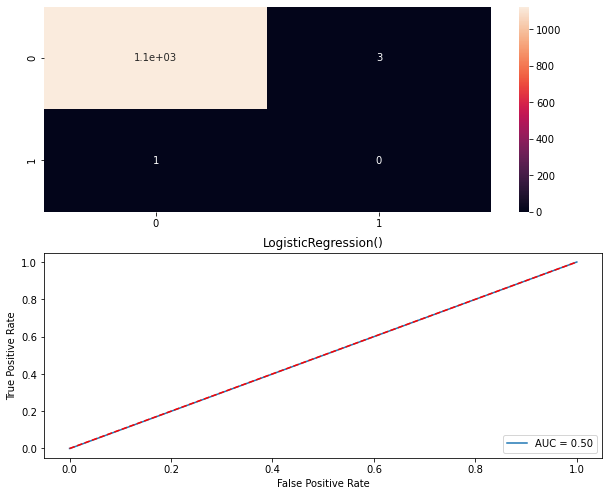

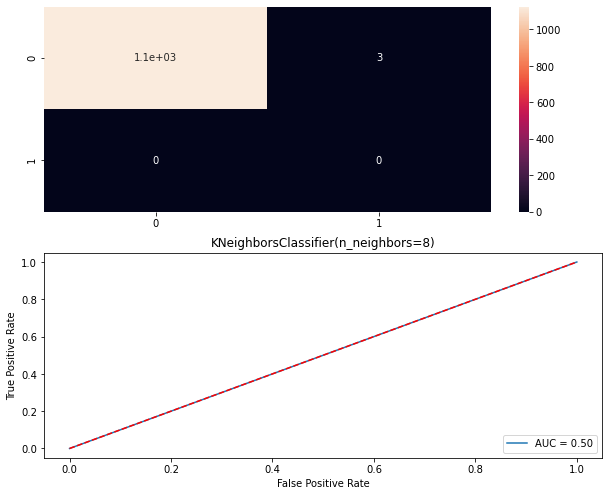

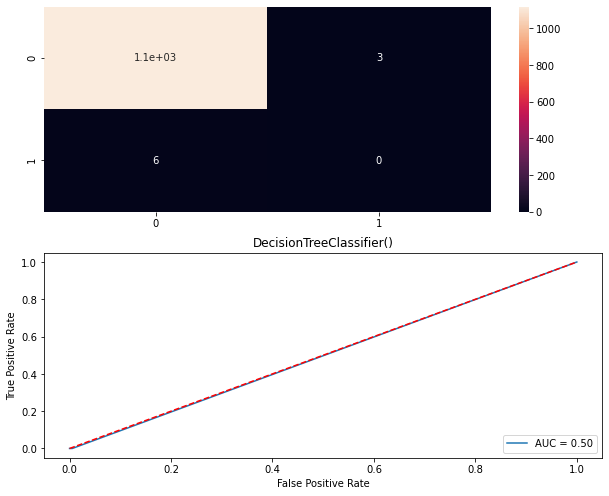

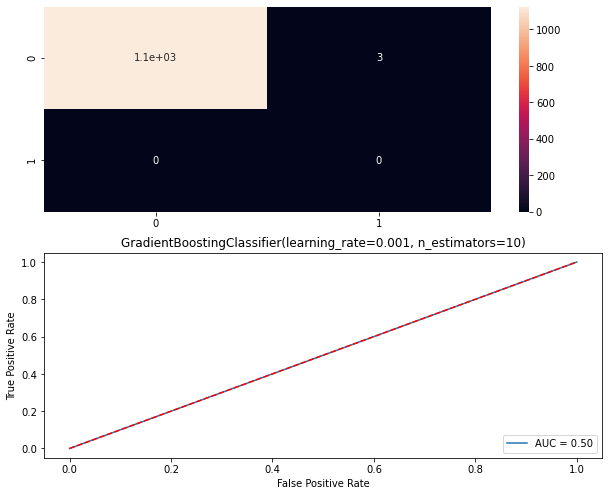

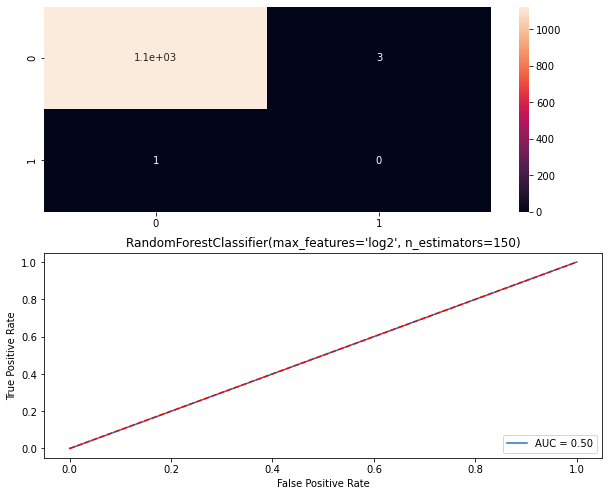

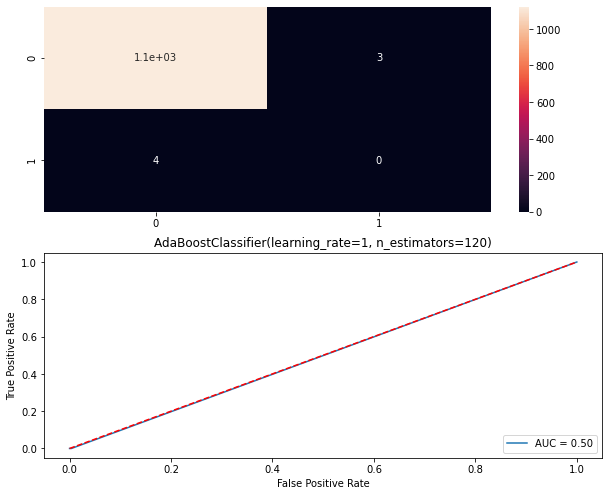

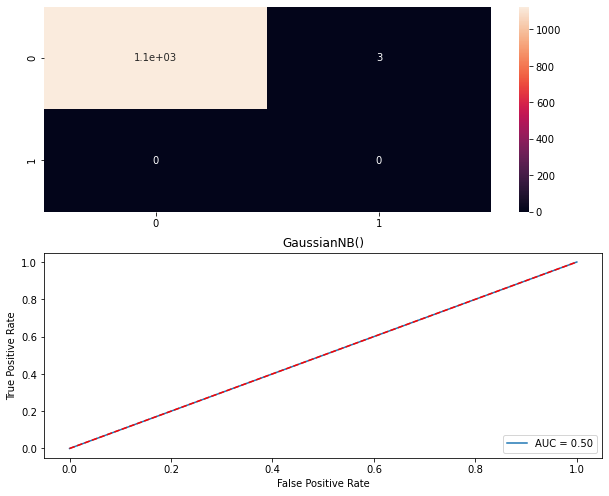

In [46]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=8),
          DecisionTreeClassifier(criterion='gini'),GradientBoostingClassifier(learning_rate=0.001,n_estimators=10),
          RandomForestClassifier(max_features='log2',n_estimators=150),
          AdaBoostClassifier(learning_rate =1, n_estimators = 120,),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(X_train,Y_train)
    k.score(X_train,Y_train)
    predict=k.predict(X_test)
    print(predict)
    AS=accuracy_score(predict,Y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,X,Y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,Y_test)
    print(cm)
    print("")
    print(classification_report(predict,Y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    

In [47]:

result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.996457,0.989190,0.499556
1,KNeighborsClassifier,0.997343,0.991141,0.500000
2,DecisionTreeClassifier,0.992028,0.981215,0.497336
3,GradientBoostingClassifier,0.997343,0.991141,0.500000
4,RandomForestClassifier,0.996457,0.988482,0.499556
5,GaussianNB,0.993800,0.990963,0.498224
6,AdaBoostClassifier,0.997343,0.991141,0.500000


In [49]:
gbc= GradientBoostingClassifier(learning_rate=0.001,n_estimators=10)
gbc.fit(X_train,Y_train)
predict=gbc.predict(X_test)
AS=accuracy_score(predict,Y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,X,Y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score=',roc_auc)

Accuracy Score = 0.9973427812223207
The CV Score = 0.9911410336141315
roc_auc_score= 0.5


# Now Taking Patient addmited to intensive care unit (1=yes, 0=no) as Output Variable¶


In [50]:
X=df.drop(['Patient addmited to intensive care unit (1=yes, 0=no)'],axis=1)
Y=df['Patient addmited to intensive care unit (1=yes, 0=no)']

In [51]:
X.head()

,Patient age quantile,SARS-Cov-2 exam result,"Patient addmited to regular ward (1=yes, 0=no)","Patient addmited to semi-intensive unit (1=yes, 0=no)",Hematocrit,Hemoglobin,Platelets,Mean platelet volume,Red blood Cells,Lymphocytes,Mean corpuscular hemoglobin concentration (MCHC),Leukocytes,Basophils,Mean corpuscular hemoglobin (MCH),Eosinophils,Mean corpuscular volume (MCV),Monocytes,Red blood cell distribution width (RDW),Serum Glucose,Respiratory Syncytial Virus,Influenza A,Influenza B,Parainfluenza 1,CoronavirusNL63,Rhinovirus/Enterovirus,Mycoplasma pneumoniae,Coronavirus HKU1,Parainfluenza 3,Chlamydophila pneumoniae,Adenovirus,Parainfluenza 4,Coronavirus229E,CoronavirusOC43,Inf A H1N1 2009,Bordetella pertussis,Metapneumovirus,Parainfluenza 2,Neutrophils,Urea,Proteina C reativa mg/dL,Creatinine,Potassium,Sodium,"Influenza B, rapid test","Influenza A, rapid test",Alanine transaminase,Aspartate transaminase,Gamma-glutamyltransferase,Total Bilirubin,Direct Bilirubin,Indirect Bilirubin,Alkaline phosphatase,Ionized calcium,Strepto A,Magnesium,pCO2 (venous blood gas analysis),Hb saturation (venous blood gas analysis),Base excess (venous blood gas analysis),pO2 (venous blood gas analysis),Fio2 (venous blood gas analysis),Total CO2 (venous blood gas analysis),pH (venous blood gas analysis),HCO3 (venous blood gas analysis),Rods #,Segmented,Promyelocytes,Metamyelocytes,Myelocytes,Myeloblasts,Urine - Esterase,Urine - Aspect,Urine - pH,Urine - Hemoglobin,Urine - Bile pigments,Urine - Ketone Bodies,Urine - Nitrite,Urine - Density,Urine - Urobilinogen,Urine - Protein,Urine - Sugar,Urine - Leukocytes,Urine - Crystals,Urine - Red blood cells,Urine - Hyaline cylinders,Urine - Granular cylinders,Urine - Yeasts,Urine - Color,Partial thromboplastin time (PTT),Relationship (Patient/Normal),International normalized ratio (INR),Lactic Dehydrogenase,"Prothrombin time (PT), Activity",Vitamin B12,Creatine phosphokinase (CPK),Ferritin,Arterial Lactic Acid,Lipase dosage,D-Dimer,Albumin,Hb saturation (arterial blood gases),pCO2 (arterial blood gas analysis),Base excess (arterial blood gas analysis),pH (arterial blood gas analysis),Total CO2 (arterial blood gas analysis),HCO3 (arterial blood gas analysis),pO2 (arterial blood gas analysis),Arteiral Fio2,Phosphor,ctO2 (arterial blood gas analysis)
0,13,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17,0,0,0,0.236515,-0.02234,-0.517413,0.010677,0.102004,0.318366,-0.95079,-0.09461,-0.223767,-0.292269,1.482158,0.166192,0.357547,-0.625073,-0.140648,2,2,2,2,2,1,0,2,2,2,2,2,2,2,2,2,2,1,-0.619086,1.198059,-0.147895,2.089928,-0.305787,0.862512,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0.0,0.0,0,0.0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,0,0,0,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0

In [52]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Patient addmited to intensive care unit (1=yes, 0=no), dtype: int64

In [53]:
# standard scaling data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(X))

StandardScaler()


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [55]:
lg=LogisticRegression()
max_acc_score(lg,X,Y)

max acc score corresponding to 91 is 0.9973427812223207


91

In [56]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=91,test_size=0.20)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(4515, 109)
(4515,)
(1129, 109)
(1129,)


# Using GridSearchCV to select best Parameter

In [57]:
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")


knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")






dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")



gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(gbc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")



rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150,200],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(gbc,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)
print("\n")


ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200]}
gd=GridSearchCV(ada,parameters)
gd.fit(X_train,Y_train)
print(gd.best_params_)




{'penalty': 'l2'}


{'n_neighbors': 4}


{'criterion': 'entropy'}


{'learning_rate': 0.001, 'n_estimators': 10}


{'max_features': 'log2', 'n_estimators': 200}


{'learning_rate': 1, 'n_estimators': 50}




The model score for LogisticRegression() are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.9973427812223207
The cv score is 0.9911402483839964

[[1126    3]
 [   0    0]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1129
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1129
   macro avg       0.50      0.50      0.50      1129
weighted avg       1.00      1.00      1.00      1129



roc_auc_score 0.5


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=4) are:
[0 0 0 ... 0 0 0]
Accuracy score = 0.9973427812223207
The cv score is 0.9925583740082542

[[1126    3]
 [   0    0]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1129
           1       0.00      0.00      0.00         0

    accuracy                           1.00      1129
   macro avg       0.50      0.50      0.50

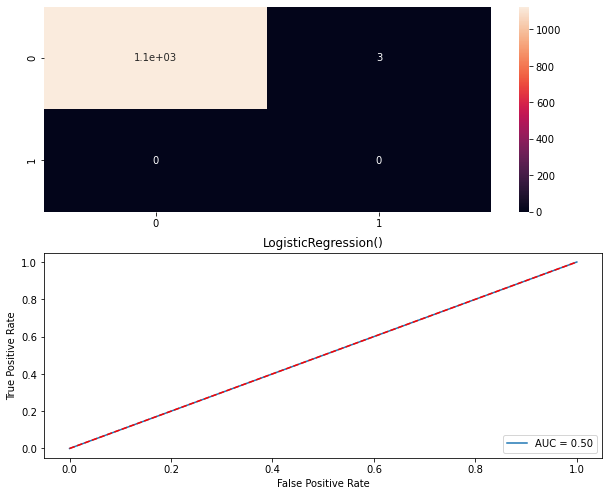

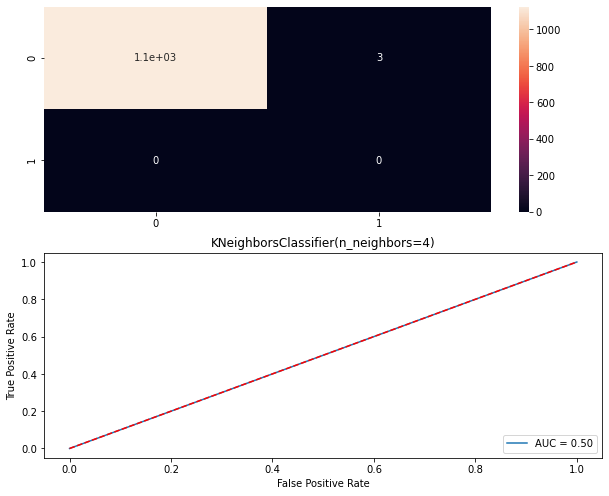

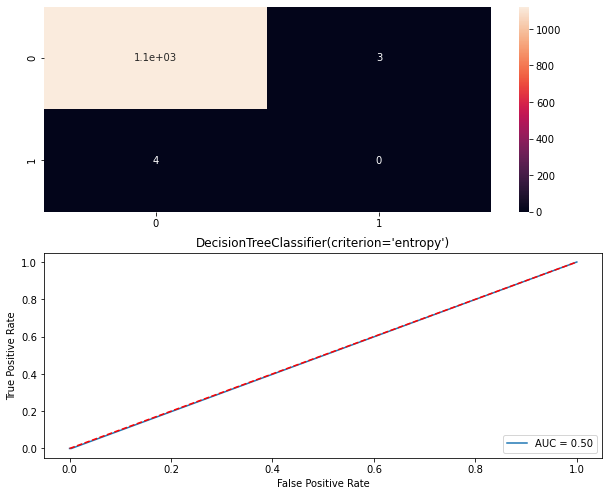

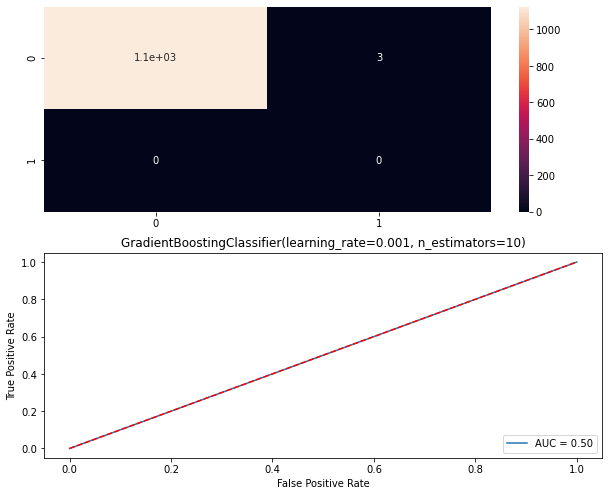

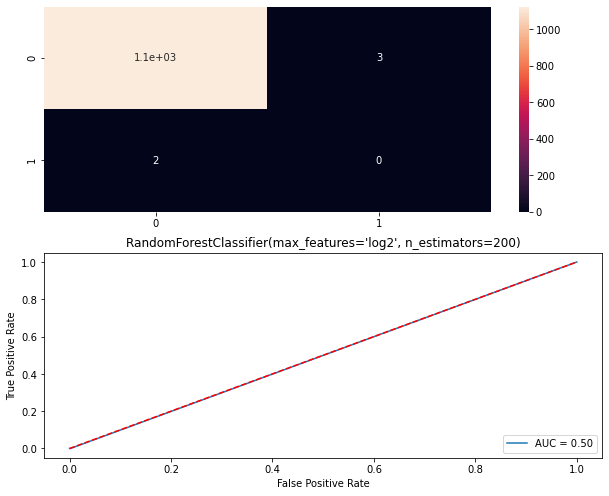

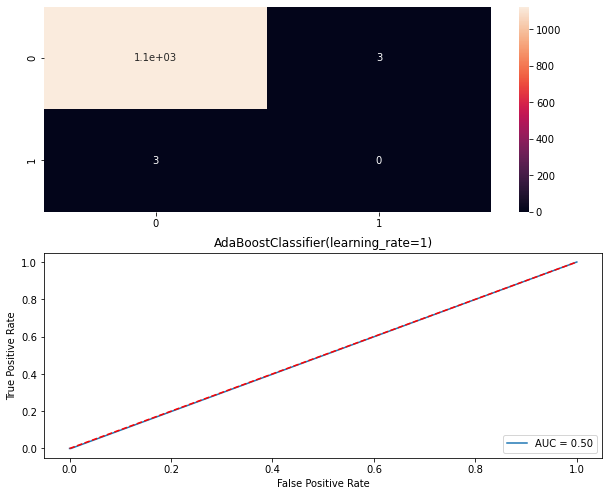

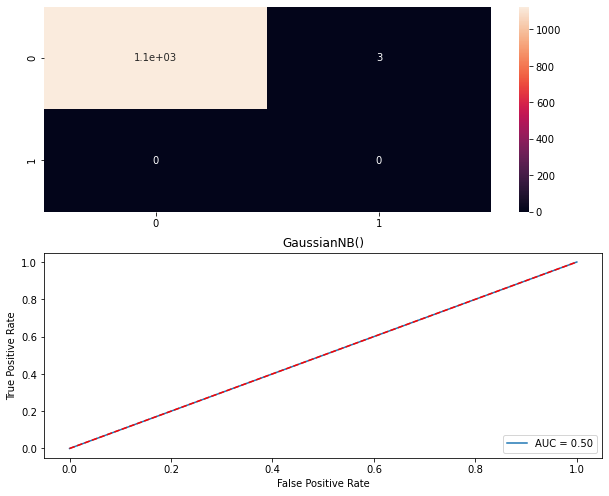

In [58]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=4),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=0.001,n_estimators=10),
          RandomForestClassifier(max_features='log2',n_estimators=200),
          AdaBoostClassifier(learning_rate =1, n_estimators = 50,),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(X_train,Y_train)
    k.score(X_train,Y_train)
    predict=k.predict(X_test)
    print(predict)
    AS=accuracy_score(predict,Y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,X,Y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,Y_test)
    print(cm)
    print("")
    print(classification_report(predict,Y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    
    

In [59]:

result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.997343,0.991140,0.500000
1,KNeighborsClassifier,0.997343,0.992558,0.500000
2,DecisionTreeClassifier,0.993800,0.986355,0.498224
3,GradientBoostingClassifier,0.997343,0.992736,0.500000
4,RandomForestClassifier,0.995571,0.992204,0.499112
5,GaussianNB,0.994686,0.992026,0.498668
6,AdaBoostClassifier,0.997343,0.992204,0.500000


In [60]:
gbc= GradientBoostingClassifier(learning_rate=0.001,n_estimators=10)
gbc.fit(X_train,Y_train)
predict=gbc.predict(X_test)
AS=accuracy_score(predict,Y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,X,Y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(Y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score=',roc_auc)

Accuracy Score = 0.9973427812223207
The CV Score = 0.9922042352172575
roc_auc_score= 0.5


# Saving the model

In [62]:
import joblib
joblib.dump(gbc,"covid19_dataset.pkl")

['covid19_dataset.pkl']